In [5]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore
import matplotlib.pyplot as plt
import pandas as pd

### Authorization

Generate a key in the Firebase Console!

In [6]:
cred = credentials.Certificate("/Users/lauracorssac/idp-lets-go-e92b8-firebase-adminsdk-fbsvc-42ad0e1400.json")
# firebase_admin.initialize_app(cred)

### Users Fetch

Warning: Don't do it often! This counts as one read per user, so it might get expensive!

In [7]:
db = firestore.client()

users_ref = db.collection("users")
docs = users_ref.stream()

user_data = []
for doc in docs:
    user_data.append(doc.to_dict())

print(user_data)

[{'birthYear': '1998', 'trials': [{'responseTime': 1622, 'step': 2}, {'responseTime': 2208, 'step': 1}, {'responseTime': 1992, 'step': 7}, {'responseTime': 3011, 'step': 3}, {'responseTime': 2644, 'step': 3}, {'responseTime': 1890, 'step': 2}, {'responseTime': 1805, 'step': 5}, {'responseTime': 1673, 'step': 5}, {'responseTime': 4064, 'step': 3}, {'responseTime': 2342, 'step': 1}, {'responseTime': 8363, 'step': 1}, {'responseTime': 1522, 'step': 1}, {'responseTime': 3747, 'step': 2}, {'responseTime': 2923, 'step': 4}, {'responseTime': 1973, 'step': 6}, {'responseTime': 1973, 'step': 4}, {'responseTime': 2142, 'step': 1}, {'responseTime': 2862, 'step': 6}, {'responseTime': 1972, 'step': 3}, {'responseTime': 4565, 'step': 6}, {'responseTime': 1891, 'step': 4}, {'responseTime': 2259, 'step': 2}, {'responseTime': 1870, 'step': 6}, {'responseTime': 5773, 'step': 7}, {'responseTime': 2727, 'step': 6}, {'responseTime': 3695, 'step': 7}, {'responseTime': 2007, 'step': 5}, {'responseTime': 1488

In [8]:
df = pd.DataFrame(user_data)

# Test Score Analysis per Group

In [9]:
test_score = [user.get("score") for user in user_data]
test_score_control = [user.get("score") for user in user_data if user.get("group") == "control"]
test_score_target = [user.get("score") for user in user_data if user.get("group") != "control"]

print(test_score_control)
print(test_score_target)

test_score_control = [abs(score) for score in test_score_control]
test_score_target = [abs(score) for score in test_score_target]

print(test_score_control)
print(test_score_target)

[0.48657111345372195, 0.6666326625325661, -0.9600457239542586, 0.12330397935442072, -0.39849877726198335, -0.1362392997740628, -0.8467005005055872, -0.9187903411456837, -0.4295684316970873, 0.4663918582295588]
[-0.14657937180797798, -0.5496175787274267, -0.8854198782566315, -0.47436487365162167, -1.1301326765470672, 0.5351306033811581, -0.13176924168852955, 0.225573041162426, -0.7771376720516867, -0.737610671839284, 0.002065185134862091, -0.9358783100383485]
[0.48657111345372195, 0.6666326625325661, 0.9600457239542586, 0.12330397935442072, 0.39849877726198335, 0.1362392997740628, 0.8467005005055872, 0.9187903411456837, 0.4295684316970873, 0.4663918582295588]
[0.14657937180797798, 0.5496175787274267, 0.8854198782566315, 0.47436487365162167, 1.1301326765470672, 0.5351306033811581, 0.13176924168852955, 0.225573041162426, 0.7771376720516867, 0.737610671839284, 0.002065185134862091, 0.9358783100383485]


In [10]:
avg_control_test = sum(test_score_control) / len(test_score_control)
avg_target_test = sum(test_score_target) / len(test_score_target)

print(avg_control_test)
print(avg_target_test)

0.5432742687908931
0.544273258690585


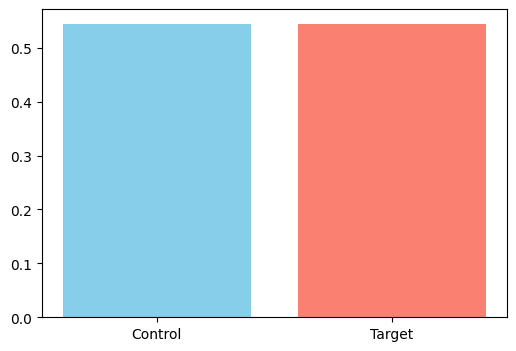

In [11]:
group_names = ['Control', 'Target']
group_averages = [avg_control_test, avg_target_test]

plt.figure(figsize=(6, 4))
bars = plt.bar(group_names, group_averages, color=['skyblue', 'salmon'])

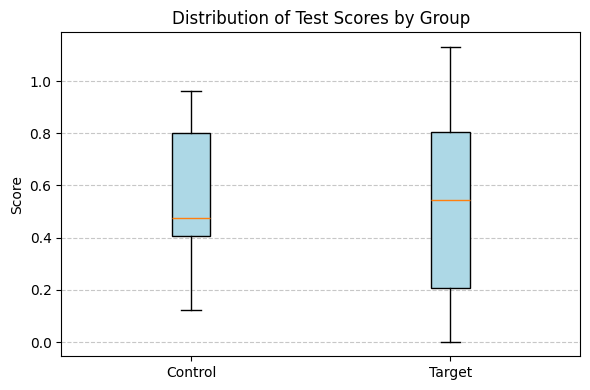

In [12]:
data = [test_score_control, test_score_target]
group_names = ['Control', 'Target']

plt.figure(figsize=(6, 4))
plt.boxplot(
    data, 
    tick_labels=group_names, 
    patch_artist=True,
    boxprops=dict(facecolor="lightblue"),
)

plt.title('Distribution of Test Scores by Group')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [15]:
df['abs_score'] = df['score'].abs()

# Test Score Analysis per Gender

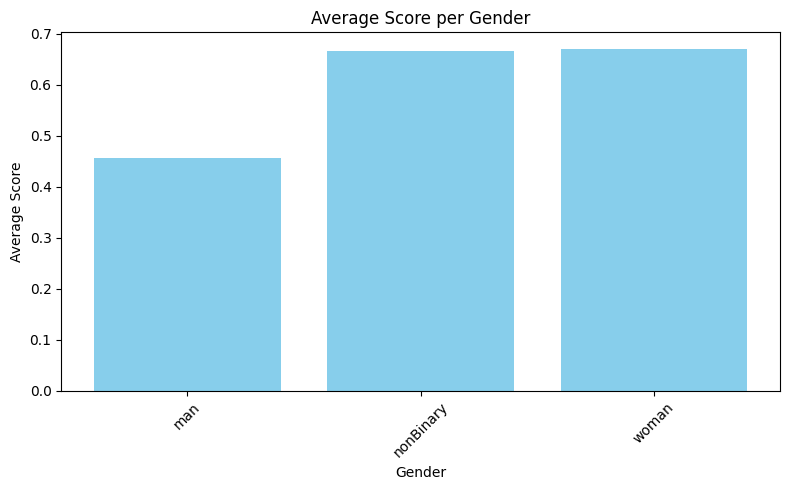

In [17]:
avg_scores_gender = df.groupby('gender')['abs_score'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(avg_scores_gender['gender'], avg_scores_gender['abs_score'], color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.title('Average Score per Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
gender_counts = df['gender'].value_counts(normalize=True)

# Keep only genders representing at least 10% of data
valid_genders = gender_counts[gender_counts >= 0.10].index
filtered_df = df[df['gender'].isin(valid_genders)]

avg_scores_gender = filtered_df.groupby('gender')['abs_score'].mean().reset_index()


avg_scores_gender

,gender,abs_score
0,man,0.457060
1,woman,0.669452


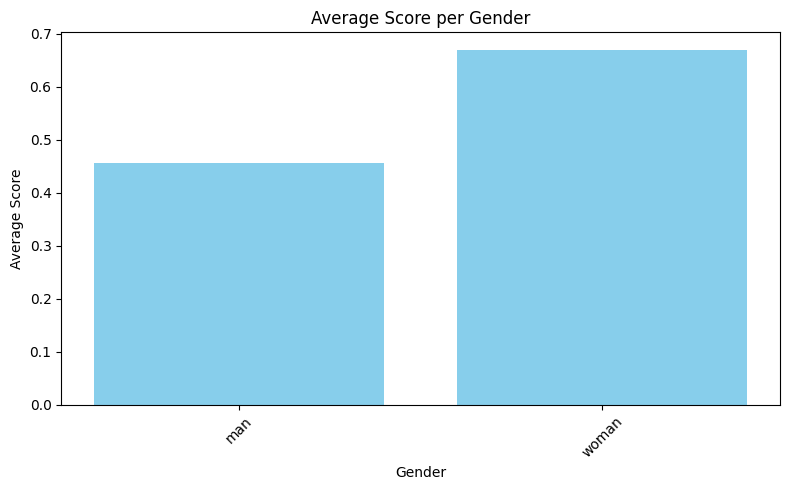

In [19]:
plt.figure(figsize=(8, 5))
plt.bar(avg_scores_gender['gender'], avg_scores_gender['abs_score'], color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.title('Average Score per Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Test Score per Ethinicity

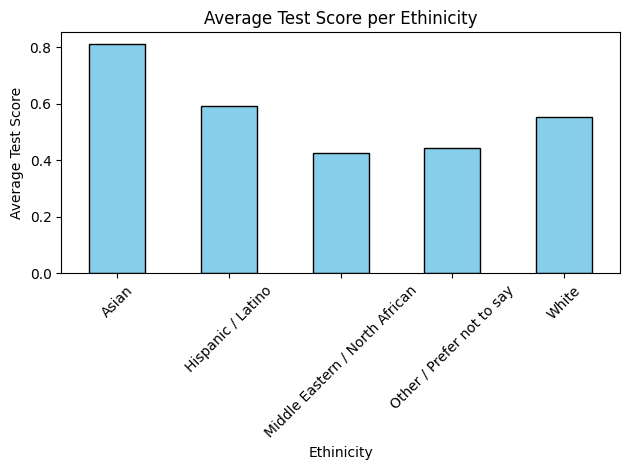

In [21]:
df_exploded = df.explode('races')

avg_scores = df_exploded.groupby('races')['abs_score'].mean()

avg_scores.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Ethinicity')
plt.ylabel('Average Test Score')
plt.title('Average Test Score per Ethinicity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Test Score per Occupation

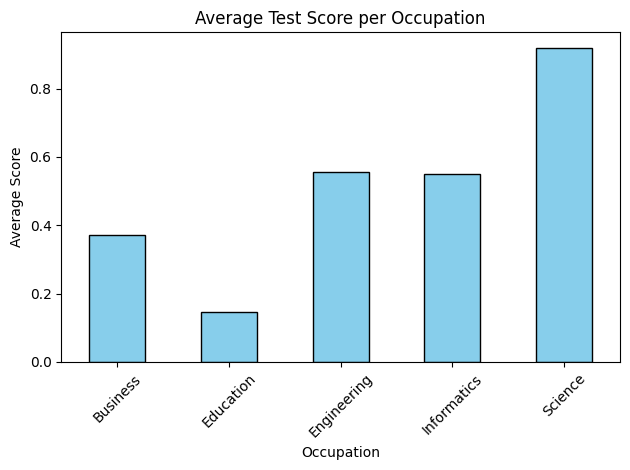

In [22]:
# Expand the occupations list into multiple rows per user
df_exploded = df.explode('professions')

# Group and compute average score per occupation
avg_scores = df_exploded.groupby('professions')['abs_score'].mean()

avg_scores.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Occupation')
plt.ylabel('Average Score')
plt.title('Average Test Score per Occupation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

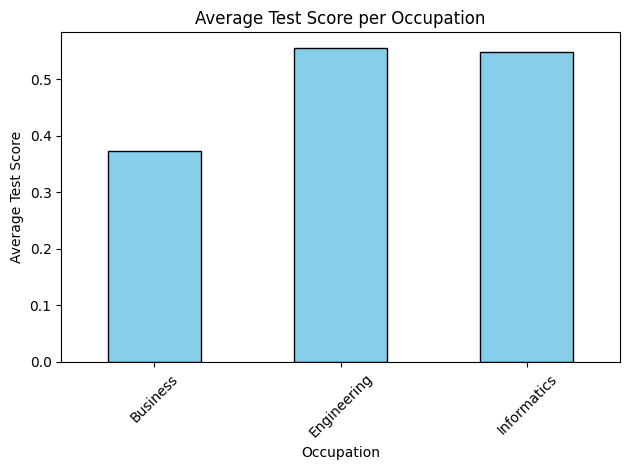

In [24]:
occupation_counts = df_exploded['professions'].value_counts(normalize=True)

valid_occupations = occupation_counts[occupation_counts >= 0.10].index

filtered_df = df_exploded[df_exploded['professions'].isin(valid_occupations)]

avg_scores = filtered_df.groupby('professions')['abs_score'].mean()

avg_scores.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Occupation')
plt.ylabel('Average Test Score')
plt.title('Average Test Score per Occupation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Test Score per Education

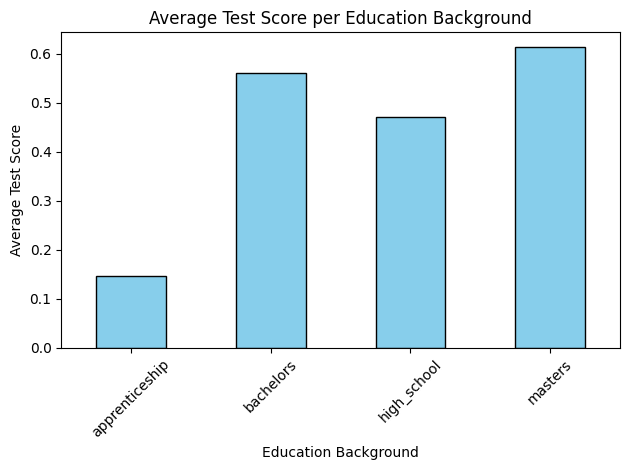

In [25]:
avg_scores = df.groupby('education')['abs_score'].mean()

# Step 2: Plot as a histogram (bar plot for categorical data)
avg_scores.plot(kind='bar', color='skyblue', edgecolor='black')

# Step 3: Add labels and title
plt.xlabel('Education Background')
plt.ylabel('Average Test Score')
plt.title('Average Test Score per Education Background')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

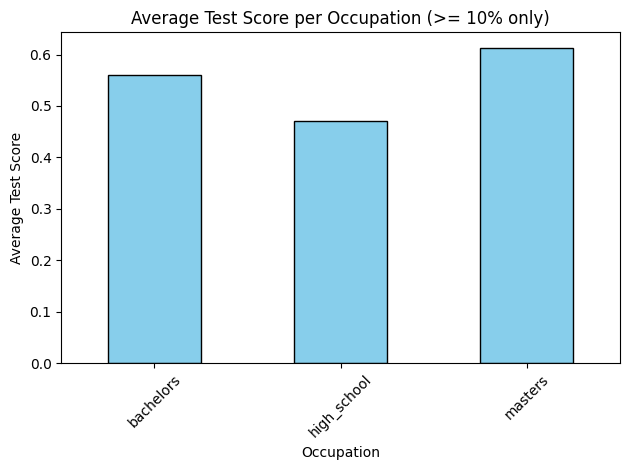

In [27]:
edu_counts = df['education'].value_counts(normalize=True)

valid_edu = edu_counts[edu_counts >= 0.10].index

filtered_df = df[df['education'].isin(valid_edu)]

avg_scores = filtered_df.groupby('education')['abs_score'].mean()

avg_scores.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Occupation')
plt.ylabel('Average Test Score')
plt.title('Average Test Score per Occupation (>= 10% only)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Test Score per Age

/var/folders/bc/gcpryyxs74146gl1yfg2msyw0000gn/T/ipykernel_24458/636254452.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_scores = df.groupby('age_group')['abs_score'].mean()


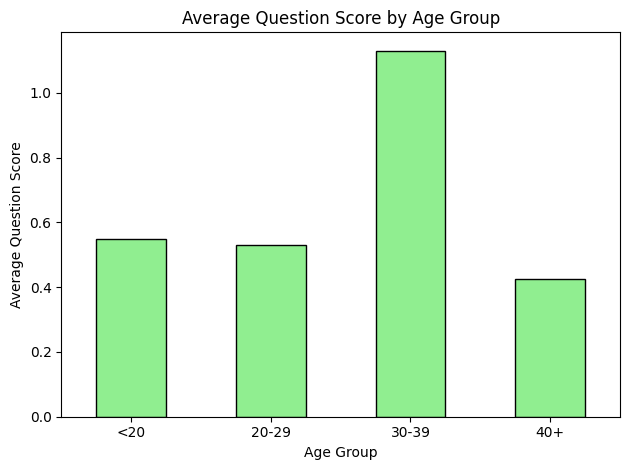

In [32]:
df['age'] = 2025 - df['birthYear'].astype(int)

bins = [0, 19, 29, 39, float('inf')]
labels = ['<20', '20-29', '30-39', '40+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

avg_scores = df.groupby('age_group')['abs_score'].mean()

avg_scores.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.xlabel('Age Group')
plt.ylabel('Average Question Score')
plt.title('Average Question Score by Age Group')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/var/folders/bc/gcpryyxs74146gl1yfg2msyw0000gn/T/ipykernel_24458/1362164561.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_scores = filtered_df.groupby('age_group')['abs_score'].mean()


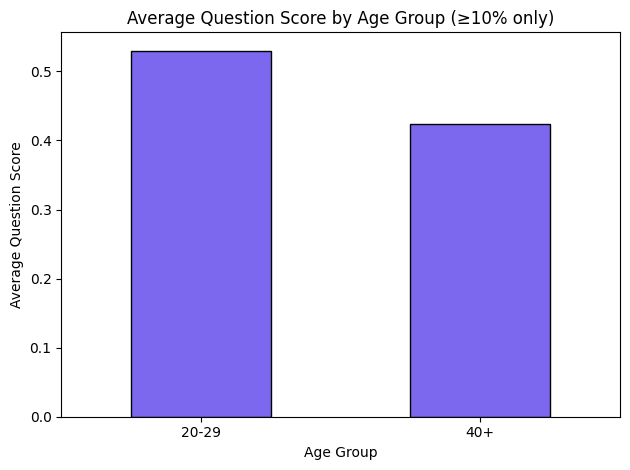

In [46]:
age_group_counts = df['age_group'].value_counts(normalize=True)
valid_age_groups = age_group_counts[age_group_counts >= 0.10].index
filtered_df = df[df['age_group'].isin(valid_age_groups)]

avg_scores = filtered_df.groupby('age_group')['abs_score'].mean()

avg_scores = avg_scores.dropna()

avg_scores.plot(kind='bar', color='mediumslateblue', edgecolor='black')

plt.xlabel('Age Group')
plt.ylabel('Average Question Score')
plt.title('Average Question Score by Age Group (≥10% only)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()